In [ ]:
#first we need to download the dependencies
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dense,Flatten
from keras.utils import plot_model

from keras.utils import to_categorical


In [ ]:
#so first  we create our own model
input1=Input((256,256,3)) #here we enter our model shape
s1=Conv2D(64,3,activation='relu',padding='same')(input1) #layer after which it is to be added
s2=Conv2D(32,3,activation='relu',padding='same')(s1)
s3=Conv2D(32,3,activation='relu',padding='same')(s2)
s4=MaxPooling2D(pool_size=(2,2))(s3)
s5=MaxPooling2D(pool_size=(2,2))(s4)
s6=Conv2D(16,3,activation='relu',padding='same')(s5)
#now we add a flatten layer
s7=Flatten()(s6)
dense=Dense(128,activation="relu")(s7)
dense1=Dense(32,activation="relu")(dense)

#now we get the output class
output1=Dense(3,activation="softmax")(dense1)
model=Model(inputs=input1,outputs=output1)
print(model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      18464     
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                        

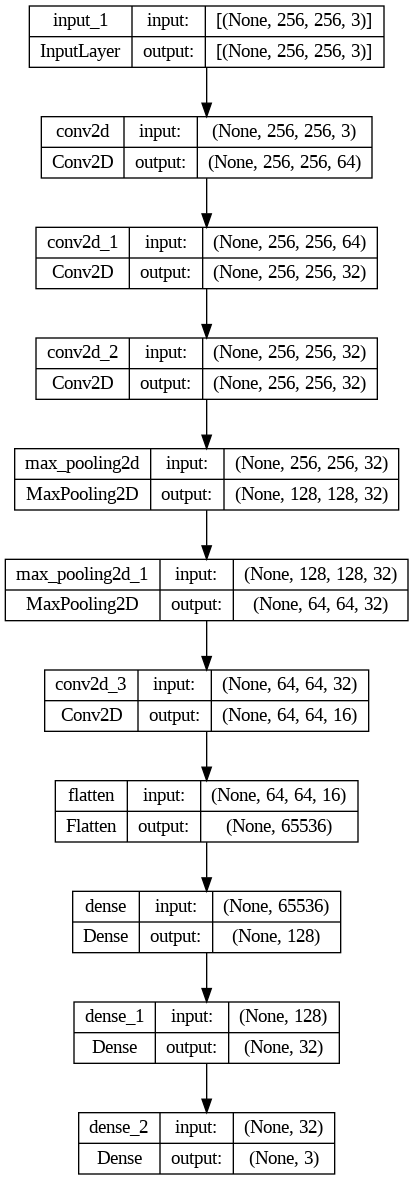

In [ ]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [ ]:
#now we have successfully created our model
#we compile the model
model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['accuracy'],run_eagerly=True)

#now after compiling the model , we would need to fit the data and then evaluate it
#so now we prepare our data




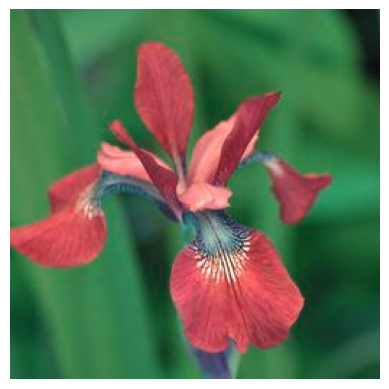

In [ ]:
#lets see our images
import matplotlib.pyplot as plt

import cv2
z="/content/sample_data/setosa/setosa-1.jpg"
x=cv2.imread(z)

plt.imshow(x)
plt.axis("off")
plt.show()

In [ ]:
train_setosa=[] #label is 0
test_setosa=[]
setosa_y_label=[]

train_versicolor=[] #label is 1
test_versicolor=[]
versicolor_y_label=[]

train_virginica=[] #label is 2
test_virginica=[]
virginica_y_label=[]

for i in range(1,30):
  train_setosa.append(f"/content/sample_data/setosa/setosa-{i}.jpg")
  setosa_y_label.append(0)
  train_versicolor.append(f"/content/sample_data/versicolor/versicolor-{i}.jpg")
  versicolor_y_label.append(1)
  train_virginica.append(f"/content/sample_data/virginica/virginica-{i}.jpg")
  virginica_y_label.append(2)


test_y=[]
test_setosa_y=[]
test_versicolor_y=[]
test_virginica_y=[]
for j in range(30,36):
  test_setosa.append(f"/content/sample_data/setosa/setosa-{i}.jpg")
  test_setosa_y.append(0)
  test_versicolor.append(f"/content/sample_data/versicolor/versicolor-{i}.jpg")
  test_versicolor_y.append(1)
  test_virginica.append(f"/content/sample_data/virginica/virginica-{i}.jpg")
  test_virginica_y.append(2)


test_y=test_setosa_y+test_versicolor_y+test_virginica_y
test_y=to_categorical(test_y) #change to one hot encoded values


#here we have successfully differentiated between the train and the test
total_train_image=train_setosa+train_versicolor+train_virginica
total_train_y=setosa_y_label+versicolor_y_label+virginica_y_label

total_test_image=test_setosa+test_versicolor+test_virginica

print(len(total_train_image))

print(len(test_y))
print(len(total_test_image))

total_train_y=np.asarray(total_train_y)

87
18
18


In [ ]:

import cv2
final_image=[]

for i in range(len(total_train_image)):
    z = total_train_image[i]
    print("Image path:", z)
    x = cv2.imread(z)
    if x is None:
        print("Failed to load image:", z)
    else:
        final_image.append(x)
        print(x.shape)
        # You can perform further processing on the loaded image here
#now we change the type to np.asarray
final_image=np.asarray(final_image)

final_test_image=[]
for i in range(len(total_test_image)):
  z = total_train_image[i]
  print("Image path:", z)
  x = cv2.imread(z)
  if x is None:
      print("Failed to load image:", z)
  else:
      final_test_image.append(x)
      print(x.shape)
final_test_image=np.asarray(final_test_image)


Image path: /content/sample_data/setosa/setosa-1.jpg
(256, 256, 3)
Image path: /content/sample_data/setosa/setosa-2.jpg
(256, 256, 3)
Image path: /content/sample_data/setosa/setosa-3.jpg
(256, 256, 3)
Image path: /content/sample_data/setosa/setosa-4.jpg
(256, 256, 3)
Image path: /content/sample_data/setosa/setosa-5.jpg
(256, 256, 3)
Image path: /content/sample_data/setosa/setosa-6.jpg
(256, 256, 3)
Image path: /content/sample_data/setosa/setosa-7.jpg
(256, 256, 3)
Image path: /content/sample_data/setosa/setosa-8.jpg
(256, 256, 3)
Image path: /content/sample_data/setosa/setosa-9.jpg
(256, 256, 3)
Image path: /content/sample_data/setosa/setosa-10.jpg
(256, 256, 3)
Image path: /content/sample_data/setosa/setosa-11.jpg
(256, 256, 3)
Image path: /content/sample_data/setosa/setosa-12.jpg
(256, 256, 3)
Image path: /content/sample_data/setosa/setosa-13.jpg
(256, 256, 3)
Image path: /content/sample_data/setosa/setosa-14.jpg
(256, 256, 3)
Image path: /content/sample_data/setosa/setosa-15.jpg
(25

In [ ]:
#now we fit it into the model
total_train_y_one=to_categorical(total_train_y)
model.fit(final_image,total_train_y_one,epochs=5,verbose=1,batch_size=2)

Epoch 1/5
44/44 [==============================] - 87s 2s/step - loss: 0.6097 - accuracy: 0.6897
Epoch 2/5
44/44 [==============================] - 61s 1s/step - loss: 0.3165 - accuracy: 0.9080
Epoch 3/5
44/44 [==============================] - 61s 1s/step - loss: 0.1822 - accuracy: 0.9080
Epoch 4/5
44/44 [==============================] - 66s 2s/step - loss: 0.3094 - accuracy: 0.8736
Epoch 5/5
44/44 [==============================] - 63s 1s/step - loss: 0.2727 - accuracy: 0.8966


In [ ]:
#now we evalauate the model
print(len(final_test_image))
print(len(test_y))

for image in (final_test_image):
  print(image.shape)

18
18
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [ ]:
model.evaluate(final_test_image,test_y,batch_size=2,verbose=1)

#we can see that the model is overfitting


9/9 [==============================] - 2s 211ms/step - loss: 12.2865 - accuracy: 0.3333


[12.286540985107422, 0.3333333432674408]

In [ ]:
#now here we try to use the vgg16 pretrained model fro training
from keras.applications import VGG16
pretrained_model_full=VGG16(include_top=True,weights='imagenet',input_shape=(224,224,3))

pretrained_model_full.summary()



Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
final_resized_image=[]
for i in range(len(total_train_image)):
    z = total_train_image[i]
    print("Image path:", z)
    x = cv2.imread(z)
    if x is None:
        print("Failed to load image:", z)
    else:
        x=cv2.resize(x,(224,224))
        final_resized_image.append(x)
        print(x.shape)
        # You can perform further processing on the loaded image here
#now we change the type to np.asarray
final_resized_image=np.asarray(final_resized_image)


final_resized_test_image=[]
for i in range(len(total_test_image)):
  z = total_train_image[i]
  print("Image path:", z)
  x = cv2.imread(z)
  if x is None:
      print("Failed to load image:", z)
  else:
      x=cv2.resize(x,(224,224))
      final_resized_test_image.append(x)
      print(x.shape)
final_resized_test_image=np.asarray(final_resized_test_image)



Image path: /content/sample_data/setosa/setosa-1.jpg
(224, 224, 3)
Image path: /content/sample_data/setosa/setosa-2.jpg
(224, 224, 3)
Image path: /content/sample_data/setosa/setosa-3.jpg
(224, 224, 3)
Image path: /content/sample_data/setosa/setosa-4.jpg
(224, 224, 3)
Image path: /content/sample_data/setosa/setosa-5.jpg
(224, 224, 3)
Image path: /content/sample_data/setosa/setosa-6.jpg
(224, 224, 3)
Image path: /content/sample_data/setosa/setosa-7.jpg
(224, 224, 3)
Image path: /content/sample_data/setosa/setosa-8.jpg
(224, 224, 3)
Image path: /content/sample_data/setosa/setosa-9.jpg
(224, 224, 3)
Image path: /content/sample_data/setosa/setosa-10.jpg
(224, 224, 3)
Image path: /content/sample_data/setosa/setosa-11.jpg
(224, 224, 3)
Image path: /content/sample_data/setosa/setosa-12.jpg
(224, 224, 3)
Image path: /content/sample_data/setosa/setosa-13.jpg
(224, 224, 3)
Image path: /content/sample_data/setosa/setosa-14.jpg
(224, 224, 3)
Image path: /content/sample_data/setosa/setosa-15.jpg
(22

In [ ]:
from keras.utils import to_categorical

vgg_features_train=pretrained_model_full.predict(final_resized_image)

vgg_features_train = vgg_features_train.reshape(-87, 1000)
print(vgg_features_train.shape)



3/3 [==============================] - 49s 15s/step
(87, 1000)


In [ ]:
#now we create a model

model2=keras.Sequential()
model2.add(Flatten(input_shape=(87,1000)))
model2.add(Dense(100,activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.BatchNormalization())
model2.add(Dense(10,activation='softmax'))


model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 87000)             0         
                                                                 
 dense_22 (Dense)            (None, 100)               8700100   
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_9 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 8701510 (33.19 MB)
Trainable params: 8701310 (33.19 MB)
Non-trainable params: 200 (800.00 Byte)
_________

In [ ]:

history_1=model2.fit(vgg_features_train,total_train_y_one,epochs=3,batch_size=3)


Epoch 1/3


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_10" is incompatible with the layer: expected shape=(None, 87, 1000), found shape=(3, 1000)
